# Bias and  variance trade-off

Bias: The inability of model to capture the relationship of the training data.

best model-> low bias to more bias -> worst

Variance: differce of fits on different data sets

**Overfitting**:training error is low, testing error is high.

**Underfitting**:training error is high ,testing error is low.

hence, low bias and low variance should be preffered.

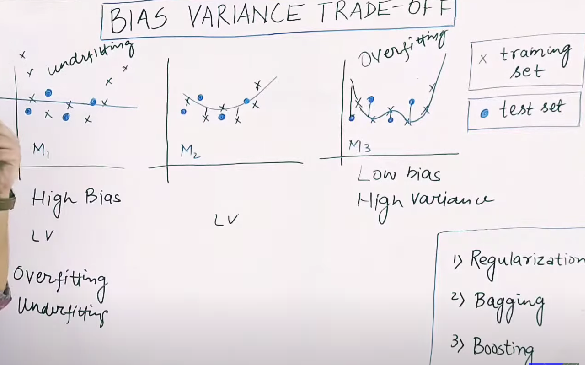

# Regularization

**Reduce overfitting**
perform extermely well on training dataset and worst on 

3 methods of regularization:

1.Ridge(L2)

2.LASSO(L1)

3.Elastic Net

1.Ridge:add regularisation term lambda*(m^2) to the loss function ,even if the bias is low the high m valued overfitted model gets low m. **refer for more clarity**


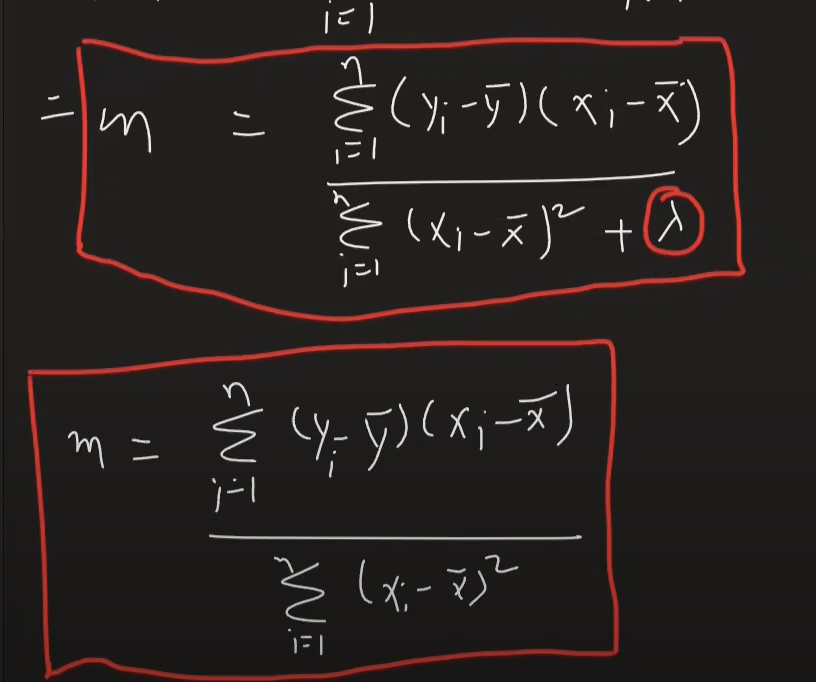

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
x,y=load_diabetes(return_X_y=True,as_frame=True)
x.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [3]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
linear_reg=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
linear_reg.fit(x_train,y_train)
res=linear_reg.predict(x_test)
print(r2_score(y_test,res))
# print(np.sqrt(mean_squared_error(y_test,res)))
R=Ridge(alpha=0.01)
R.fit(x_train,y_train)
res=R.predict(x_test)
print(r2_score(y_test,res))

0.4526027629719195
0.455981950457911


->not very clear improvements


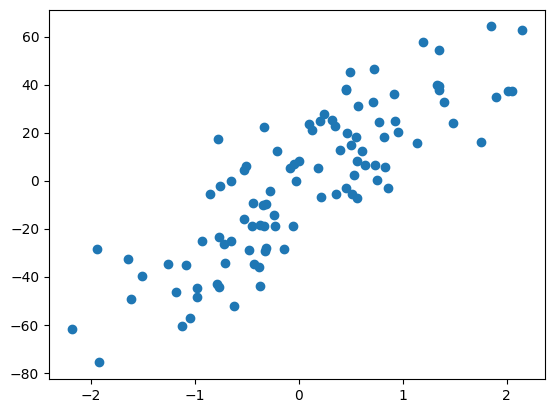

In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
x,y=make_regression(n_features=1,n_informative=1,n_samples=100,random_state=13,noise=20,n_targets=1)
plt.scatter(x,y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
model=LinearRegression()
model.fit(x,y)
res=model.predict(x)
print(model.coef_,model.intercept_)
R=Ridge(alpha=10)
R.fit(x,y)
R.predict(x)
print(R.coef_,R.intercept_)

[27.82809103] -2.29474455867698
[24.9546267] -2.1269130035235735


In [6]:
# custom ridge regression function:
class Ridge_regressor():
    def __init__(self,alpha=0.01):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,x:np.ndarray,y:np.ndarray):
        numerator=0
        denomnator=0
        for i in range(x.shape[0]):
            numerator+=(y[i]-y.mean())*(x[i]-x.mean())
            denomnator+=(x[i]-x.mean())*(x[i]-x.mean())
        denomnator+=+self.alpha
        self.m=numerator/denomnator
        self.b=y.mean()-self.m*x.mean()
        print(self.m,self.b)
    def predict(self,x:np.ndarray):
        return x*self.m+self.b
t=Ridge_regressor(alpha=10)
t.fit(x,y)
res=t.predict(x)
#  same value as we got above

[24.9546267] [-2.126913]


**For more cols:**
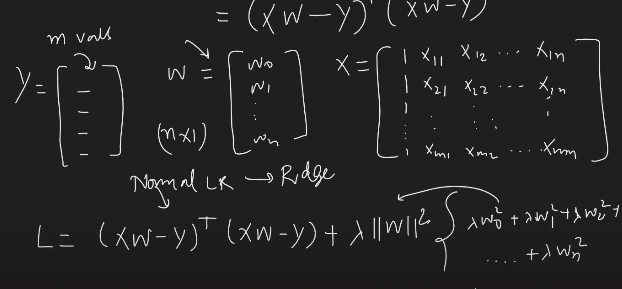
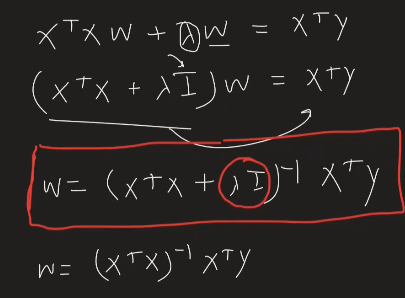


also refer weighted ridge regression for more deeper understanding ans implementation -> instead of lambda * I ,   we get different lamdas for different columns which can be tuned from domain knowledge or optimisation.


In [7]:
from sklearn.datasets import load_diabetes
X,Y=load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
I=Ridge(alpha=0.1,solver='cholesky')
I.fit(x_train,y_train)
res=I.predict(x_test)
print(I.coef_,I.intercept_)
r2_score(y_test,res)

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ] 151.45857456679613


0.46085219464119254

In [8]:
class custom_ridge():
    def __init__(self,alpha=0.1) -> None:
        self.alpha=alpha
        self.coef=None
        self.intercept=None
    def fit(self,x_train:np.ndarray,y_train:np.ndarray):
        x_train=np.insert(x_train,0,1,axis=1)
        I=np.identity(x_train.shape[1])
        I[0][0]=0 # since the first column belongs to the intercept coeficient it should not be multiplie with lamda
        res=np.linalg.inv(np.dot(x_train.T,x_train)+self.alpha*I).dot(x_train.T).dot(y_train)
        self.intercept=res[0]
        self.coef=res[1:]
        print(self.intercept,self.coef)
    def predict(self,x_test):
        return x_test.dot(self.coef)+self.intercept
F=custom_ridge(alpha=0.1)
F.fit(x_train,y_train)
res=F.predict(x_test)
print(r2_score(y_test,res))

151.45857456679607 [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
0.46085219464119254


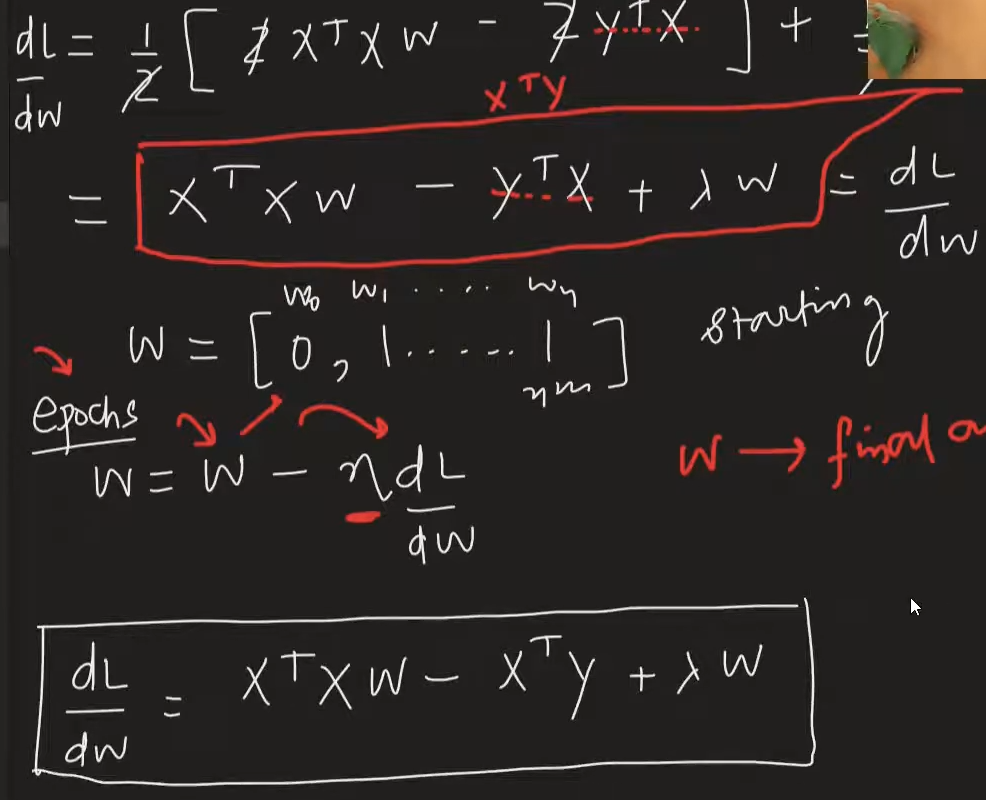


In [9]:
#using gradient descent
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(penalty='l2',max_iter=100,eta0=0.1,learning_rate='constant',alpha=0.001)
model.fit(x_train,y_train)
res=model.predict(x_test)
print(r2_score(y_test,res))

0.40910419840322


In [10]:
#  for ridge function we can use solver parameter= 'sparse_cg' or other available
model=Ridge(alpha=0.01,solver='sparse_cg')
model.fit(x_train,y_train)
res=model.predict(x_test)
r2_score(y_test,res)

0.4559819503708987

In [11]:
#  Custom batch gd ridge regressor
class gd_ridge_regressor():
    def __init__(self,alpha=0.005,learning_rate=0.005,epochs=100):
        self.alpha=alpha
        self.coef=None
        self.intercept=None
        self.learning_rate=learning_rate
        self.epochs=epochs
    def fit(self,x_train:np.ndarray,y_train:np.ndarray):
        self.coef=np.ones(x_train.shape[1])
        M=np.insert(self.coef,0,0)
        x_train=np.insert(x_train,0,1,axis=1)
        for _ in range(self.epochs):
            derivative=np.dot(x_train.T,x_train).dot(M)-x_train.T.dot(y_train)+self.alpha*M
            M=M-self.learning_rate*derivative
        self.intercept=M[0]
        self.coef=M[1:]
        print(self.intercept,self.coef)
    def predict(self,x_test:np.ndarray):
        return x_test.dot(self.coef)+self.intercept
    # def fit_by_sgd(self,x_train:np.ndarray,y_train:np.ndarray):

model=gd_ridge_regressor()
model.fit(x_train,y_train)
res=model.predict(x_test)
r2_score(y_test,res)

152.35396715994654 [  55.93107487  -35.90466484  250.76793171  180.11937863   31.26761242
    8.14223319 -138.0619005   131.79089487  210.37315233  129.54309526]


0.4064124593882966

# Important points about Ridge regression:

**Higher values are affected more**

**Bias is increased and variance is decreased**

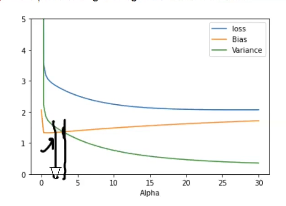

**Coeffieients decrease and the loss function increases as lambda increases**

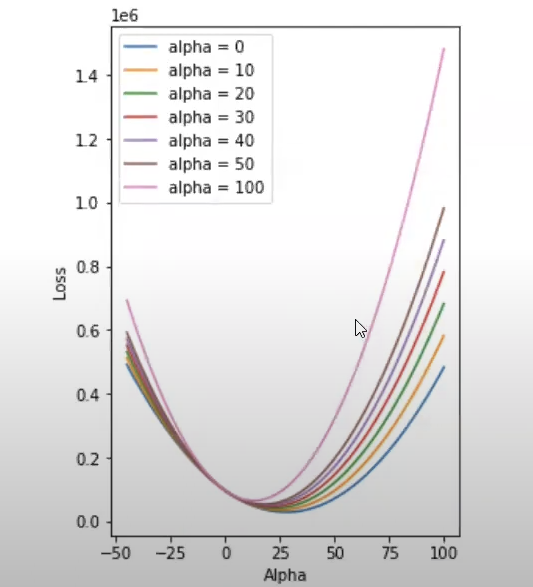

-> x-axis is slope and not alpha 

**Why the name Ridge???**

**More Info from  hard constraint Ridge regression**

->the green ellipse representing the loss function 

->the blue circle is the term lambda*(slope_1^2 + slope_2^2)

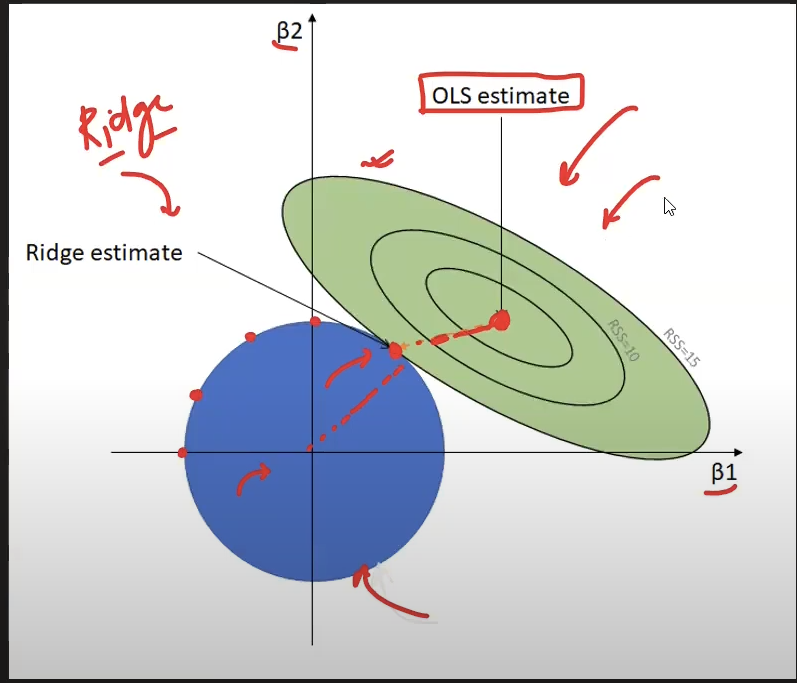

**The solution is the point(Ridge) where the ellipse intercepts the blue circle** 

**Ridge is useful when number of features is greater than equal to 2 is preffered practically**

# LASSO regression(L1 regularization):

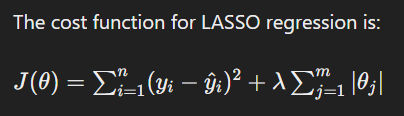



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incr

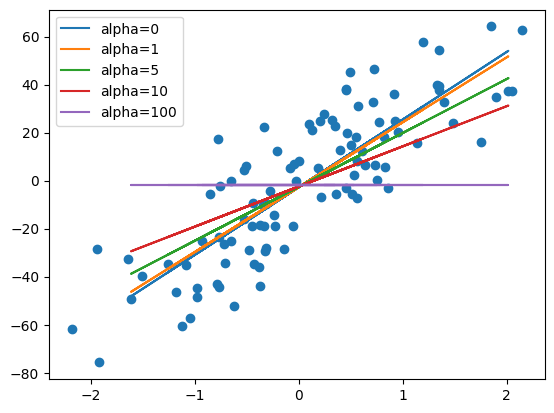

In [12]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso 
x,y=make_regression(random_state=13,n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
alphas=[0,1,5,10,100]
plt.scatter(x,y)
for i in alphas:
    L=Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

->Lasso has the ability to make the coefs of overfitted variables 0 , which can 
be used to completly remove the weight of overfitted variable.

->Ridge cannot make the vars zero, **Hence lasso is preffered over ridge**

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incr

0.45260276304361946
0.4718547867276227
0.3575918767219115
-0.011962984778542296


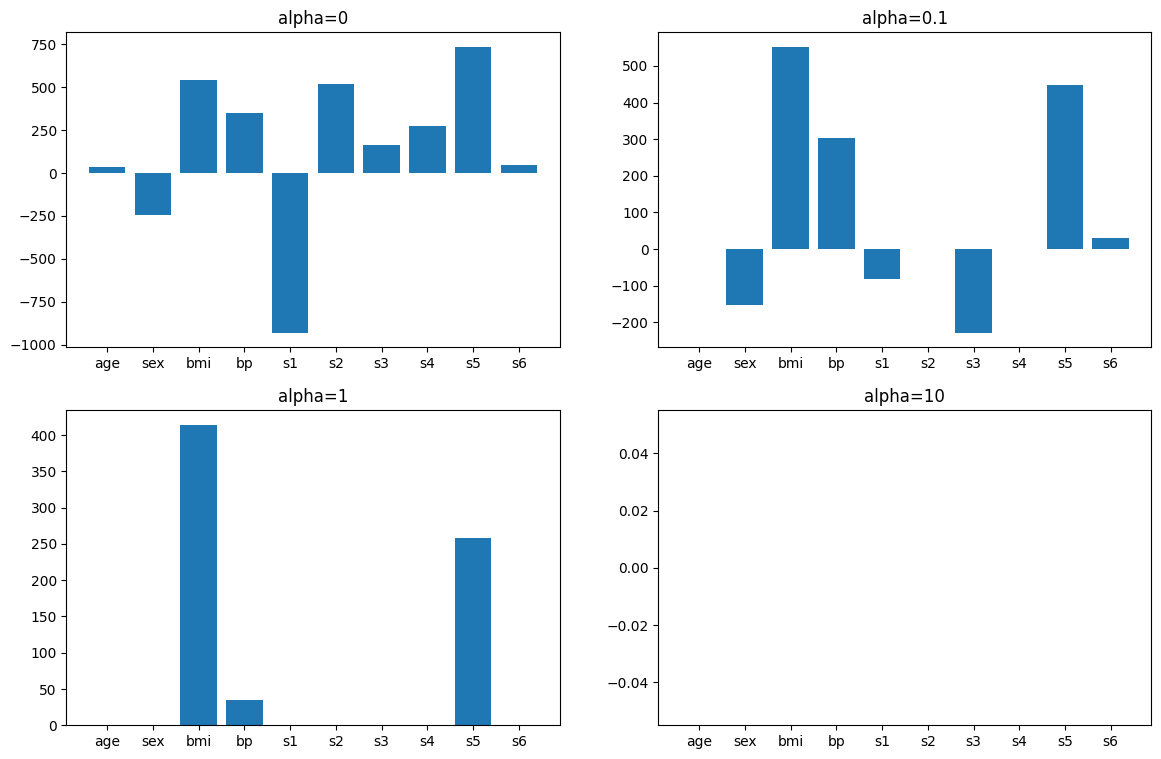

In [13]:
x,y=load_diabetes(return_X_y=True,as_frame=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
coefs=[]
alphas=[0,0.1,1,10]
intercepts=[]
plt.figure(figsize=(14,9))
for i in range(len(alphas)):
    L=Lasso(alpha=alphas[i])
    L.fit(x_train,y_train)
    plt.subplot(2,2,i+1)
    plt.bar(x.columns,L.coef_)
    plt.title('alpha={}'.format(alphas[i]))
    print(r2_score(y_test,L.predict(x_test)))
plt.show()

**We can obseve that the higher valued cols are effected more**  

**Why lasso creates a sparsity???**:

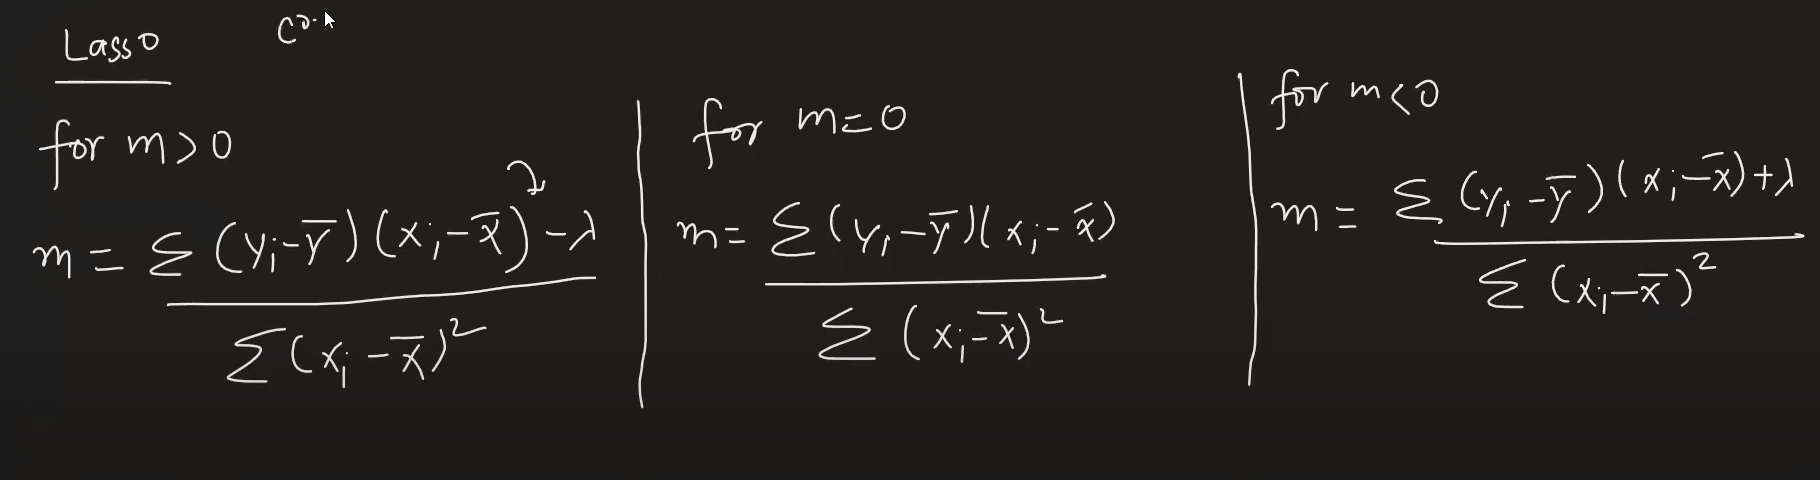

at m=0 the process ends and there is no further decrease in the slope.


# ElasticNet Regression:

combination of ridge and lasso regression.
 
In regularization techniques we add a penalty term.

Ridge is used when we know what all the terms are important and Lasso is uesd for feature selection and hence use only subset of the features.

ElasticNet regression is used when we cannot differentiate the terms.

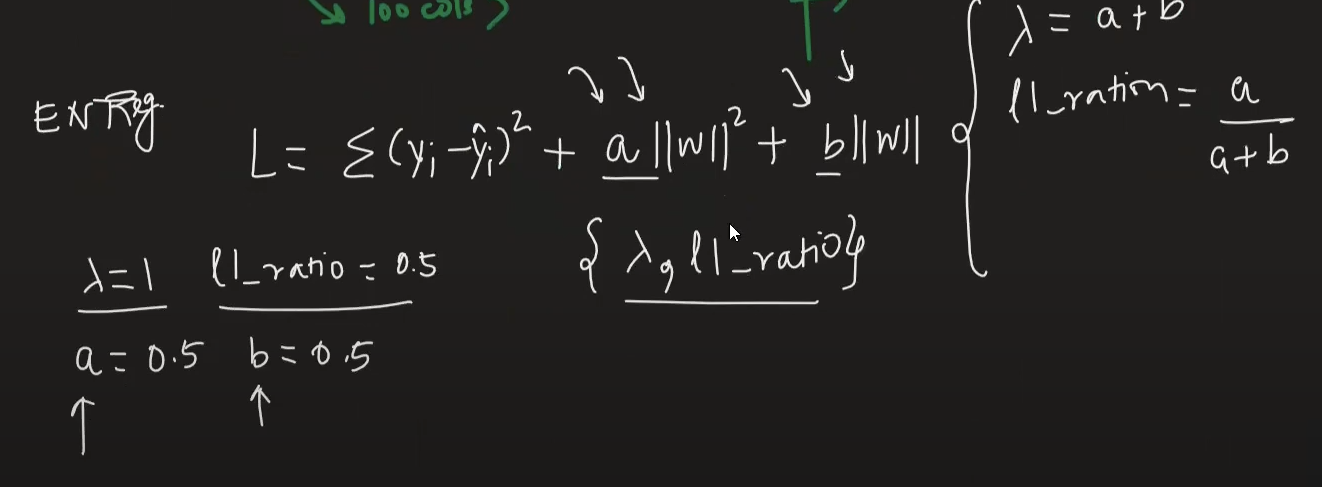

It is used when there is multicollineraity in the data.

In [17]:
from sklearn.linear_model import ElasticNet
reg=ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(x_train,y_train)
print(r2_score(y_test,reg.predict(x_test)))

0.46192536271651086
